In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline



###Задание

При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [ ]:
# При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy
strategy = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
res_nit = []
for i in strategy:
    result = differential_evolution(ackley, bounds, seed=42, strategy = i, popsize=5, init = 'latinhypercube', mutation=(0.5, 1.0))
    res_nit.append(result.nit)

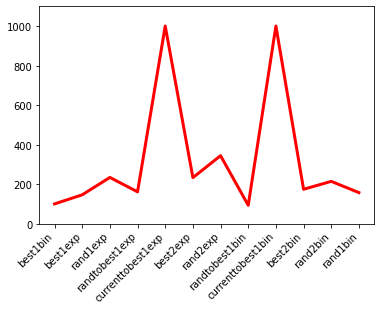

In [ ]:
x = strategy
y = res_nit
# plt.plot(x, y)
# plt.ylim([50, 1100])
# plt.xlim()


fig, ax = plt.subplots()
ax.set_ylim([0, 1100])
# ax.set_xlim([0, 10000])
ax.plot(x, y, color = 'red', linewidth = 3)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


In [ ]:
# При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: mutation
mutation = 2 * np.random.random_sample((10, 2))
res_nit = []
for i in mutation:
    result = differential_evolution(ackley, bounds, seed=42, strategy = 'randtobest1bin', popsize=5, init = 'latinhypercube', mutation=(i[0], i[1]))
    res_nit.append(result.nit)

(0.0, 2.0)

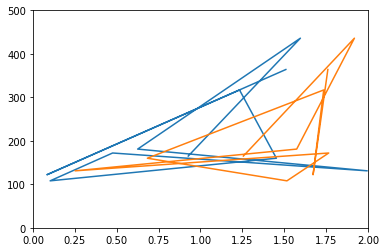

In [ ]:
x = mutation
y = res_nit
plt.plot(x, y)
plt.ylim([0, 500])
plt.xlim([0, 2])

In [ ]:
# При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: popsize+init.
popsize = np.arange(0, 15)
res_nit = []
for i in popsize:
    result = differential_evolution(ackley, bounds, seed=42, strategy = 'randtobest1bin', popsize=i, init = 'latinhypercube', mutation=(0.5, 1.0))
    res_nit.append(result.nit)

(0.0, 15.0)

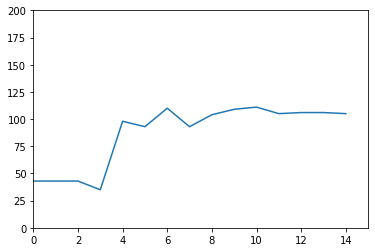

In [ ]:
x = popsize
y = res_nit
plt.plot(x, y)
plt.ylim([0, 200])
plt.xlim([0, 15])

In [ ]:
# При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: popsize, mutation.
init = ['latinhypercube', 'sobol', 'halton', 'random']
res_nit = []
for i in init:
    result = differential_evolution(ackley, bounds, seed=42, strategy = 'randtobest1bin', popsize=3, init = i, mutation=(0.5, 1.0))
    res_nit.append(result.nit)

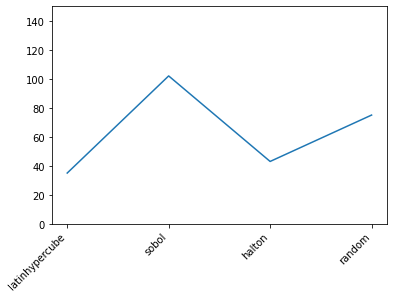

In [ ]:
x = init
y = res_nit

fig, ax = plt.subplots()
ax.set_ylim([0, 150])
ax.plot(x, y)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


###Дополнительное задание

Поэкспериментируйте с параметрами и оптимизацией через minimize:


In [ ]:
method = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'SLSQP', 'trust-constr'] # перебор по методам
res_nit = []
x0 = [0,0]
for i in method:
    result_m = minimize(ackley, x0, method=i)
    res_nit.append(result_m.nit)

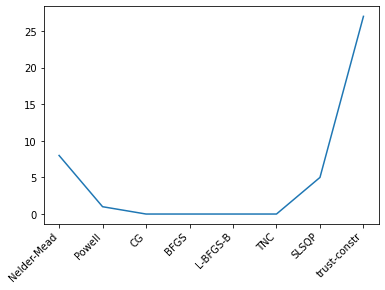

In [ ]:
x = method
y = res_nit

fig, ax = plt.subplots()
ax.plot(x, y)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()